In [2]:
from main import *
import matplotlib.pyplot as plt
import time 
import copy as copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


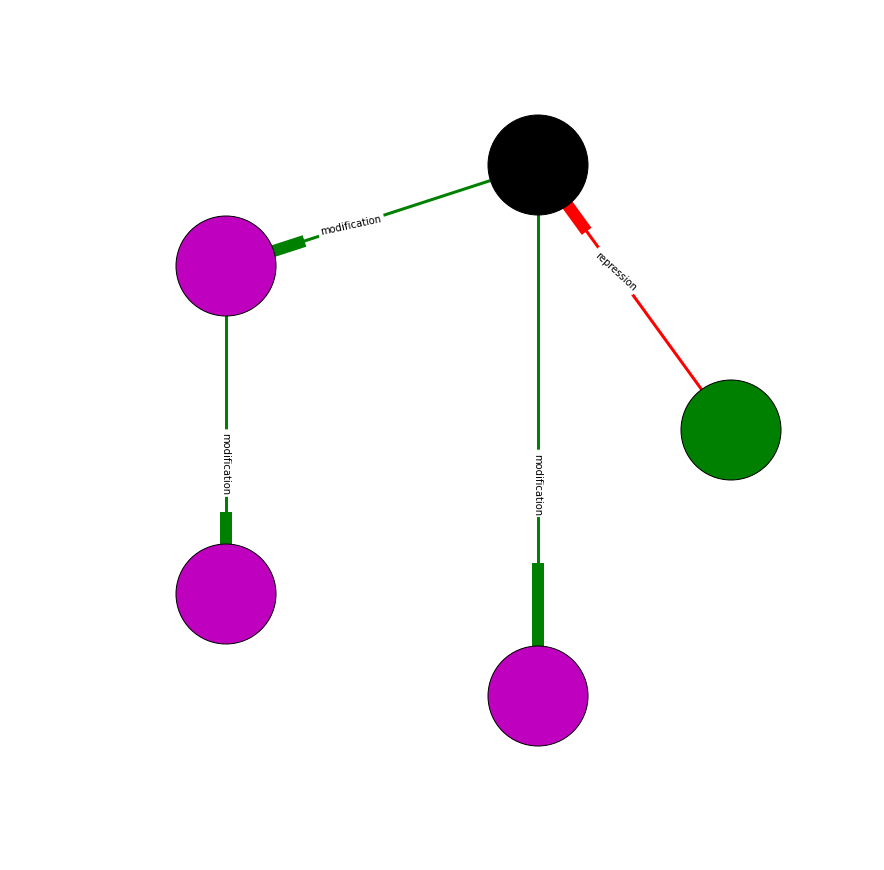

In [30]:
# run evolutionary procedure

# simulation parameters
generations = 10 # number of selection/growth cycles
population_size = 10 # total number of cells in each generation
mutations_per_division = 2 # number of mutations applied per cell-division

# temp parameters
cells_selected = 5 # number of cells selected


# initialize cell population as a single cell with 3 genes
population = [Cell(name=1, initial_genes=2, permanent_genes=1)]

# grow to desired population
while len(population) < population_size:
    # clone and mutate a randomly selected cell
    cell = np.random.choice(population)    
    cell, mutant = cell.divide(num_mutations=mutations_per_division)
    population.append(mutant)
    
# iterate through selection+growth cycles
for gen in range(0, generations):
    
    # get topology distribution for current generation's networks
    edge_counts, node_counts = zip(*list(map(lambda x:(len(x[0]), len(x[1])), [cell.get_topology() for cell in population])))
    #print('Generation', gen, ': %g edges in average network' % np.mean(edge_counts))
    
    # SELECTION
    
    # RUN DYNAMICS AND SCORE EACH CELL
    
    # SELECT CELLS ON PARETO FRONT
    population = list(np.random.choice(population, size=cells_selected))
    
    # grow ramining cells back to desired population size
    while len(population) < population_size:
        # clone and mutate a randomly selected cell
        cell = np.random.choice(population)    
        _, mutant = cell.divide(num_mutations=mutations_per_division)
        population.append(mutant)
        
# show topology of a random cell in the final population
random_cell = np.random.choice(population)
random_cell.show_topology(graph_layout='shell')

# get some basic distribution statistics
age_distribution = [cell.name for cell in population]
edge_count_distribution, node_count_distribution = zip(*list(map(lambda x:(len(x[0]), len(x[1])), [cell.get_topology() for cell in population])))
network_gene_count_distribution = [len(cell.removable_genes+cell.non_coding_rnas) for cell in population]

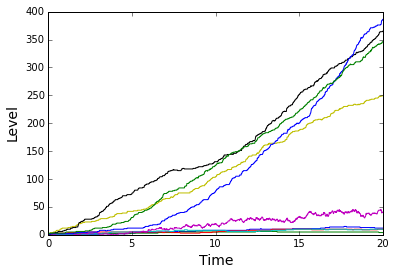

In [7]:
# run a dynamic simulation and plot all species trajectories

# create disturbance (for now, no influence. just sets timecourse)
active_species = len(random_cell.coding_rnas + random_cell.non_coding_rnas + random_cell.proteins)
disturbances = Signal('disturbance', duration=20, dt=0.01, signal=None, channels=active_species)

# set initial condition
ic = np.ones(active_species)

# run simulation
states, energy = random_cell.simulate(disturbances, ic=ic, mode='tau_leaping')

# plot all species trajectories
for species in range(0, len(states[:, 0])):
    plt.plot(disturbances.time, states[species, :])
ax = plt.gca()
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Level', fontsize=14)

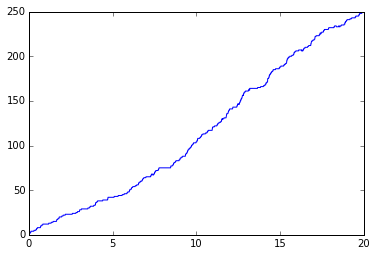

In [9]:
# plot a single species
species = 5
plt.plot(disturbances.time, states[species, :])
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Level', fontsize=14)

In [782]:
# sequentially mutate a single cell
generations = 10 # number of selection/growth cycles
mutations = 5 # number of mutations applied per cell-division

# initialize cell population as a single cell with 3 genes
cell = Cell(name=1, initial_genes=2)

# iterate through selection+growth cycles
for gen in range(0, generations):
    
    # clone and mutate a single cell
    _, cell = cell.divide(num_mutations=mutations)
    _ = cell.get_topology()

isomer_queue [6]
removing:  6
going downstream
isomer_queue []
removed downstream:  []
isomer_queue []


ValueError: a must be non-empty

In [783]:
for rxn in cell.reactions:
    #if rxn.rxn_type in ['modification', 'catalytic_degradation']:
    print(rxn.reactants, rxn.products, rxn.rxn_type)

[5] [] protein_decay
[] [9] transcription
[9] [] mrna_decay
[9] [10] translation
[10] [] protein_decay
[11] [] protein_decay
[] [12] transcription
[12] [] mrna_decay
[12] [13] translation
[13] [] protein_decay
[14] [] protein_decay
[10, 5] [14] catalytic_modification
[16] [] protein_decay
[13, 5] [16] catalytic_modification
[10, 13] [] catalytic_degradation
[11, 14] [] catalytic_degradation


In [784]:
print(cell.modified_proteins)

[5, 11, 14, 16]


In [ ]:
# 5 and 11 were not removed

In [715]:
# create custom network
for _ in range(0, 10):
    # initialize cell with one gene
    cell = Cell(name=1, initial_genes=1)

    N_add = 4
    # add N modifications
    for _ in range(0, N_add):
        cell.add_protein_modification()

    print('initial mods:')
    show_mods(cell)

    print('\n')
    # remove N modifications
    N_remove = 4
    for i in range(0, N_remove):

        print('Round ', i)
        cell.remove_protein_modification()
        show_mods(cell)
        _ = cell.get_topology()


initial mods:
Modifications
[1] [2]
[4] [5]


Catalytic Modifications
[1, 2] [3]
[1, 2] [4]


Round  0
Rxn removed:  [1, 2] [4]
Modifications
[1] [2]


Catalytic Modifications
[1, 2] [3]
Round  1
Rxn removed:  [1, 2] [3]
Modifications
[1] [2]


Catalytic Modifications
Round  2
Rxn removed:  [1] [2]
Modifications


Catalytic Modifications
Round  3
Modifications


Catalytic Modifications
initial mods:
Modifications
[1] [2]
[1] [3]
[2] [1]


Catalytic Modifications
[1, 3] [4]


Round  0
Rxn removed:  [1] [3]
Modifications
[1] [2]
[2] [1]


Catalytic Modifications
Round  1
Rxn removed:  [2] [1]
Modifications
[1] [2]


Catalytic Modifications
Round  2
Rxn removed:  [1] [2]
Modifications


Catalytic Modifications
Round  3
Modifications


Catalytic Modifications
initial mods:
Modifications
[1] [2]
[1] [3]
[3] [1]
[3] [4]


Catalytic Modifications


Round  0
Rxn removed:  [1] [2]
Modifications
[1] [3]
[3] [1]
[3] [4]


Catalytic Modifications
Round  1
Rxn removed:  [3] [4]
Modifications
[1] [3

In [714]:
def show_mods(cell):
    print('Modifications')
    for rxn in cell.reactions:
        if rxn.rxn_type == 'modification':
            print(rxn.reactants, rxn.products)
    print('\n')
    print('Catalytic Modifications')
    for rxn in cell.reactions:
        if rxn.rxn_type == 'catalytic_modification':
            print(rxn.reactants, rxn.products)

In [317]:
# DEBUGGING - INITIALIZE TONS OF NETWORKS TO FIND MESSED UP ONES

for i in range(0, 1):
    # initialize cell with one gene
    cell = Cell(name=1, initial_genes=1)

    N_add = 5
    # add N modifications
    for _ in range(0, N_add):
        cell.add_protein_modification()
    
    rxn_list = []
    rxn_list.append(cell.reactions)
    
    protein_list = []
    protein_list.append(cell.proteins)
    # remove N modifications
    N_remove = 2
    for i in range(0, N_remove):   
        cell.remove_protein_modification()
        protein_list.append(cell.proteins)
        rxn_list.append(cell.reactions)
        _ = cell.get_topology()
        
    # check for errors
    errors =  len([protein for protein in cell.modified_proteins if protein not in [rxn.products[0] for rxn in cell.reactions if rxn.rxn_type in ['modification', 'catalytic_modification']]])
    if errors > 0:
        print('ERROR OCCURRED')

candidates:  []
candidates:  []
